<a href="https://colab.research.google.com/github/saitejakatta7/House-Price-Prediction/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Images and Captions

Let’s load the full dataset into a Python dictionary:


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Flicker8k/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [ ]:
!ls


captions.txt  gdrive  Images  sample_data


In [ ]:
cd ./Images

/content/Images


In [ ]:
pwd

'/content/Images'

In [ ]:
ls

1000268201_693b08cb0e.jpg  2701487024_e866eb4550.jpg  3391209042_d2de8a8978.jpg
1001773457_577c3a7d70.jpg  2701603045_6cbdc4ce7c.jpg  3391924827_53b31542ce.jpg
1002674143_1b742ab4b8.jpg  2701895972_8605c4e038.jpg  3392019836_c7aeebca1c.jpg
1003163366_44323f5815.jpg  2702506716_17a7fb3ba4.jpg  3392293702_ccb0599857.jpg
1007129816_e794419615.jpg  270263570_3160f360d3.jpg   3392851587_a638ff25e2.jpg
1007320043_627395c3d8.jpg  2703155733_19ac6f97a8.jpg  3393035454_2d2370ffd4.jpg
1009434119_febe49276a.jpg  2704257993_d485058a5f.jpg  3393152604_27bd1037f2.jpg
1012212859_01547e3f17.jpg  2704362232_7d84503433.jpg  3393343330_b13df4d8ec.jpg
1015118661_980735411b.jpg  2704379125_9c35650d16.jpg  3393394134_0caac47e1c.jpg
1015584366_dfcec3c85a.jpg  2704934519_457dc38986.jpg  3393446245_37dd3f3b59.jpg
101654506_8eb26cfb60.jpg   2705793985_007cc703fb.jpg  339350939_6643bfb270.jpg
101669240_b2d3e7f17b.jpg   2705947033_5999147842.jpg  3393926562_66cc01b001.jpg
1016887272_03199f49c4.jpg  2706023395_ac9

In [ ]:
caption_file = "/content/captions.txt"

In [ ]:

def load_captions (filename):
  with open(filename, "r") as fp:
    # Read all text in the file
    text = fp.read()
    return (text)

In [ ]:
#--------------------------------------------------
# Each photo has a unique identifier, which is the file name of the image .jpg file
# Create a dictionary of photo identifiers (without the .jpg) to captions. Each photo identifier maps to
# a list of one or more textual descriptions.
#
# {"image_name_1" : ["caption 1", "caption 2", "caption 3"],
#  "image_name_2" : ["caption 4", "caption 5"]}
#--------------------------------------------------
def captions_dict(text):
  dict = {}
  
  # Make a List of each line in the file
  lines = text.split('\n')
  for line in lines:
    
    # Split into the <image_data> and <caption>
    line_split = line.split(',')
    if (len(line_split) != 2):
      # Added this check because dataset contains some blank lines
      continue
    else:
      image_data, caption = line_split
      #1000268201_693b08cb0e.jpg --> image_data

    # Split into <image_file> and <caption_idx>
    #image_file, caption_idx = image_data.split('#')
    # Split the <image_file> into <image_name>.jpg
    image_name = image_data.split('.')[0]
    
    # If this is the first caption for this image, create a new list for that
    # image and add the caption to it. Otherwise append the caption to the 
    # existing list
    if image_name not in dict:
      dict[image_name] = [caption]
    else:
      dict[image_name].append(caption)
  
  return (dict)

doc = load_captions(caption_file)
image_dict = captions_dict(doc)

In [ ]:
doc

'image,caption\n1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .\n1000268201_693b08cb0e.jpg,A girl going into a wooden building .\n1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .\n1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .\n1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .\n1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting\n1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .\n1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .\n1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .\n1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .\n1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .\n10026741

In [ ]:
lines = doc.split('\n')
lines[:10]

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .']

In [ ]:
i=1
for line in lines:
    print(line)
    #print(type(line))
    i+=1
    if(i==10):
      break

    # Split into the <image_data> and <caption>
    line_split = str(line).split(',')
print(line_split)

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
['1001773457_577c3a7d70.jpg', 'A black dog and a tri-colored dog playing with each other on the road .']


In [ ]:
#--------------------------------------------------
# We have three separate files which contain the names for the subset of 
# images to be used for training, validation or testing respectively
#
# Given a file, we return a set of image names (without .jpg extension) in that file
#--------------------------------------------------
def subset_image_name (filename):
  data = []
  
  with open(filename, "r") as fp:
    # Read all text in the file
    text = fp.read()
  
    # Make a List of each line in the file
    lines = text.split ('\n')
    for line in lines:
      # skip empty lines
      if (len(line) < 1):
        continue
      
      # Each line is the <image_file>
      # Split the <image_file> into <image_name>.jpg
      image_name = line.split ('.')[0]
      
      # Add the <image_name> to the list
      data.append (image_name)

    return (set(data))  

training_image_name_file = "/content/gdrive/MyDrive/Flicker8k/train_images.txt"
training_image_names = subset_image_name (training_image_name_file)

In [ ]:
import numpy as np
import tensorflow as tf

#image Preprocessing
def load_image(image_path):
    img = tf.io.read_file(image_path) #it is just as with open (filename)
    img = tf.image.decode_jpeg(img, channels=3) #decodes a JPEG-encoded image into a tensor. 
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img) #it pre-processes an image for input into the Inception V3 model. This function takes an image tensor as input and performs scalling 
    return img, image_path


#inception v3 model for the feature extraction
#we are not including the fully connected layers as we are only intrested in extracting the features within the images
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input  #an image tensor with shape (batch_size, height, width, channels)
hidden_layer = image_model.layers[-1].output  #By calling image_model.layers[-1], we are accessing the last layer of the model, which is the output tensor of the final convolutional layer before the classification layers.

image_features_extract_model = tf.keras.Model(new_input, hidden_layer) #tf.keras.Model is a class in TensorFlow Keras that allows you to create arbitrary models by specifying the inputs and outputs of the model



87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
from tqdm import tqdm

image_dir = "/content/Images/"
training_image_paths = [image_dir + name + '.jpg' for name in training_image_names]

# Get unique images
encode_train = sorted(set(training_image_paths))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train) #see in word doc
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
#The num_parallel_calls argument specifies the number of parallel calls to use for the map operation. 
#In this case, tf.data.experimental.AUTOTUNE is used, 
#which allows TensorFlow to dynamically tune the number of parallel calls based on available system resources.

for img, path in tqdm(image_dataset):
  batch_features = image_features_extract_model(img)   #it is the inception model
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

100%|██████████| 375/375 [01:37<00:00,  3.83it/s]


In [ ]:
# 375 batches of 16 batch size = 6000 training images

**Preparing Captions**  

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re

In [ ]:
#--------------------------------------------------
# Clean the captions data
#    Convert all words to lowercase.
#    Remove all punctuation.
#    Remove all words that are one character or less in length (e.g. ‘a’).
#    Remove all words with numbers in them.
#--------------------------------------------------
def captions_clean (image_dict):
  # <key> is the image_name, which can be ignored
  for key, captions in image_dict.items():
    
    # Loop through each caption for this image
    for i, caption in enumerate (captions):
      
      # Convert the caption to lowercase, and then remove all special characters from it
      caption_nopunct = re.sub(r"[^a-zA-Z0-9]+", ' ', caption.lower())
      
      # Split the caption into separate words, and collect all words which are more than 
      # one character and which contain only alphabets (ie. discard words with mixed alpha-numerics)
      clean_words = [word for word in caption_nopunct.split() if ((len(word) > 1) and (word.isalpha()))]
      
      # Join those words into a string
      caption_new = ' '.join(clean_words)
      
      # Replace the old caption in the captions list with this new cleaned caption
      captions[i] = caption_new
      

In [ ]:
#--------------------------------------------------
# Add two tokens, 'startseq' and 'endseq' at the beginning and end respectively, 
# of every caption
#--------------------------------------------------
def add_token (captions):
  for i, caption in enumerate (captions):
    captions[i] = 'startseq ' + caption + ' endseq'
  return (captions)


In [ ]:
#--------------------------------------------------
# Given a set of training, validation or testing image names, return a dictionary
# containing the corresponding subset from the full dictionary of images with captions
#
# This returned subset has the same structure as the full dictionary
# {"image_name_1" : ["caption 1", "caption 2", "caption 3"],
#  "image_name_2" : ["caption 4", "caption 5"]}
#--------------------------------------------------
def subset_data_dict (image_dict, image_names):
  dict = { image_name:add_token(captions) for image_name,captions in image_dict.items() if image_name in image_names}
  return (dict)

In [ ]:
#--------------------------------------------------
# Flat list of all captions
#--------------------------------------------------
def all_captions (data_dict):
  return ([caption for key, captions in data_dict.items() for caption in captions])

In [ ]:
#--------------------------------------------------
# Calculate the word-length of the caption with the most words
#--------------------------------------------------
def max_caption_length(captions):
  return max(len(caption.split()) for caption in captions)

In [ ]:

image_dict

{'image': ['caption'],
 '1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on 

In [ ]:
#--------------------------------------------------
# Fit a Keras tokenizer given caption descriptions
# The tokenizer uses the captions to learn a mapping from words to numeric word indices
#
# Later, this tokenizer will be used to encode the captions as numbers
#--------------------------------------------------
def create_tokenizer(data_dict):
  captions = all_captions(data_dict)
  max_caption_words = max_caption_length(captions)
  
  # Initialise a Keras Tokenizer
  tokenizer = Tokenizer()
  
  # Fit it on the captions so that it prepares a vocabulary of all words
  tokenizer.fit_on_texts(captions)
  
  # Get the size of the vocabulary
  vocab_size = len(tokenizer.word_index) + 1

  return (tokenizer, vocab_size, max_caption_words)


In [ ]:
#--------------------------------------------------
# Extend a list of text indices to a given fixed length
#--------------------------------------------------
def pad_text (text, max_length): 
  text = pad_sequences([text], maxlen=max_length, padding='post')[0]
  
  return (text)

In [ ]:
captions_clean(image_dict)
training_dict = subset_data_dict (image_dict, training_image_names)


In [ ]:
training_dict

{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tri colored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow ends

In [ ]:
# Prepare tokenizer
tokenizer, vocab_size, max_caption_words = create_tokenizer(training_dict)


**Prepare Training Data using a Tensorflow Dataset**

We now have pre-processed images and captions. We go through every training image and its matching captions to prepare the training data. This consists of:

Features (X) consisting of the image file paths
Targets (y) consisting of the cleaned and tokenized captions


In [ ]:
def data_prep(data_dict, tokenizer, max_length, vocab_size):
  X, y = list(), list()

  # For each image and list of captions
  for image_name, captions in data_dict.items():
    image_name = image_dir + image_name + '.jpg'

    # For each caption in the list of captions
    for caption in captions:

      # Convert the caption words into a list of word indices
      word_idxs = tokenizer.texts_to_sequences([caption])[0]

      # Pad the input text to the same fixed length
      pad_idxs = pad_text(word_idxs, max_length)
          
      X.append(image_name)
      y.append(pad_idxs)
  
  #return array(X), array(y)
  return X, y


In [ ]:
train_X, train_y = data_prep(training_dict, tokenizer, max_caption_words, vocab_size)

In [ ]:
import numpy as np

In [ ]:
train_X[:10]

['/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1000268201_693b08cb0e.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg',
 '/content/Images/1001773457_577c3a7d70.jpg']

In [ ]:
#np.array(train_X)

we use tensorflow Dataset object so that the inputs are fetched and feeded to the model effectively, one batch at a time
The data is fetched batch wise so that it doesn’t all have to be in memory at the same time. This allows us to support very large datasets.

The dataset loads the pre-processed encoded image vectors that were saved earlier. It uses the image file name to identify the saved file path

In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

# Load the numpy files
def map_func(img_name, cap):
   img_tensor = np.load(img_name.decode('utf-8')+'.npy')
   return img_tensor, cap

dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(map_func, [item1, item2], [tf.float32, tf.int32]),num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

**Image Caption Model with Attention**

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [ ]:
class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

**Training**

In [ ]:
embedding_dim = 256
units = 512
vocab_size = vocab_size
num_steps = len(train_X) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)


In [ ]:
loss_plot = []
@tf.function
def train_step(img_tensor, target):
  loss = 0

  # initializing the hidden state for each batch
  # because the captions are not related from image to image
  hidden = decoder.reset_state(batch_size=target.shape[0])

  dec_input = tf.expand_dims([tokenizer.word_index['startseq']] * target.shape[0], 1)

  with tf.GradientTape() as tape:
      features = encoder(img_tensor)

      for i in range(1, target.shape[1]):
          # passing the features through the decoder
          predictions, hidden, _ = decoder(dec_input, features, hidden)

          loss += loss_function(target[:, i], predictions)

          # using teacher forcing
          dec_input = tf.expand_dims(target[:, i], 1)

  total_loss = (loss / int(target.shape[1]))

  trainable_variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, trainable_variables)

  optimizer.apply_gradients(zip(gradients, trainable_variables))

  return loss, total_loss


In [ ]:
import time
start_epoch = 0
EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')


Epoch 1 Batch 0 Loss 2.9231
Epoch 1 Batch 100 Loss 1.8246
Epoch 1 Batch 200 Loss 1.5414
Epoch 1 Batch 300 Loss 1.3983
Epoch 1 Batch 400 Loss 1.3326
Epoch 1 Loss 1.617978
Time taken for 1 epoch 132.48 sec

Epoch 2 Batch 0 Loss 1.3333
Epoch 2 Batch 100 Loss 1.2805
Epoch 2 Batch 200 Loss 1.3346
Epoch 2 Batch 300 Loss 1.2891
Epoch 2 Batch 400 Loss 1.2554
Epoch 2 Loss 1.252310
Time taken for 1 epoch 51.20 sec

Epoch 3 Batch 0 Loss 1.1185
Epoch 3 Batch 100 Loss 1.0844
Epoch 3 Batch 200 Loss 1.2127
Epoch 3 Batch 300 Loss 1.1400
Epoch 3 Batch 400 Loss 1.0753
Epoch 3 Loss 1.119503
Time taken for 1 epoch 49.29 sec

Epoch 4 Batch 0 Loss 1.3160
Epoch 4 Batch 100 Loss 1.0781
Epoch 4 Batch 200 Loss 0.9513
Epoch 4 Batch 300 Loss 0.9602
Epoch 4 Batch 400 Loss 1.1042
Epoch 4 Loss 1.028822
Time taken for 1 epoch 49.88 sec

Epoch 5 Batch 0 Loss 0.9326
Epoch 5 Batch 100 Loss 0.9055
Epoch 5 Batch 200 Loss 1.0325
Epoch 5 Batch 300 Loss 0.8713
Epoch 5 Batch 400 Loss 0.8707
Epoch 5 Loss 0.955706
Time taken fo

In [ ]:
def evaluate(image, max_length):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['startseq']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == 'endseq':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot


In [ ]:
def check_test(test_image_names, image_dict, image_dir, max_caption_words):
  # captions on the validation set
  rid = np.random.randint(0, len(test_image_names))
  image_name = test_image_names[rid]
  real_caption = image_dict[image_name]

  image_path = image_dir + image_name + '.jpg'
  result, attention_plot = evaluate(image_path, max_caption_words)

  from IPython.display import Image, display
  display(Image(image_path))
  print('Real Caption:', real_caption)
  print('Prediction Caption:', ' '.join(result[:-1]))
  


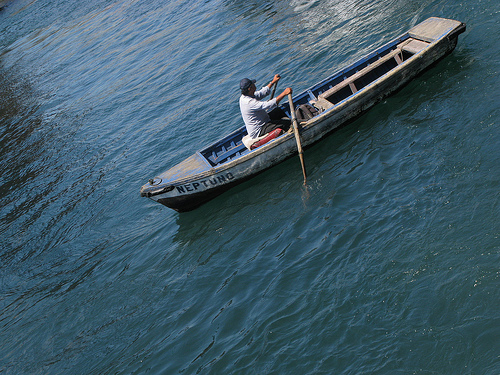

Real Caption: ['man in rowboat is rowing across blue water', 'man is rowing in small boat called neptuno', 'man rows his boat below', 'man rowing boat', 'the fisherman paddles in his to new spot']
Prediction Caption: three kids gather against the water


In [ ]:
test_image_name_file = "/content/gdrive/MyDrive/Flicker8k/test_images.txt"
test_image_names = subset_image_name (test_image_name_file)
test_image_names = list(test_image_names)
image_dir = "/content/Images/"
check_test(test_image_names, image_dict, image_dir, max_caption_words)

In [ ]:
import pickle


# Save the optimizer state for encoder
with open('/content/gdrive/MyDrive/Saved_Models/Image_Caption_Gen/encoder_optimizer.pkl', 'wb') as f:
    pickle.dump(encoder.get_config(), f)

# Save the optimizer state for decoder
with open('/content/gdrive/MyDrive/Saved_Models/Image_Caption_Gen/decoder_optimizer.pkl', 'wb') as f:
    pickle.dump(decoder.get_config(), f)

In [ ]:
encoder.get_config()
decoder.get_config()

{'embedding_dim': 256, 'units': 512, 'vocab_size': 7076}

In [ ]:
# Save the encoder model
# encoder.save('/content/gdrive/MyDrive/Saved_Models/Image_Caption_Gen/encoder_model.h5')

# # Save the decoder model
# decoder.save('/content/gdrive/MyDrive/Saved_Models/Image_Caption_Gen/decoder_model.h5')

with open('/content/gdrive/MyDrive/Saved_Models/Image_Caption_Gen/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


with open('/content/gdrive/MyDrive/Saved_Models/Image_Caption_Gen/decoder.pkl', 'wb') as f:
    pickle.dump(decoder, f)

